# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** [Anathalia Marc-Charles]  
**Date:** [9/14/2025]  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [71]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization
library(readxl)

# Check current working directory
getwd()
setwd("/workspaces/assignment-2-version3-anathaliajmc/data")
getwd()

[1] "/workspaces/assignment-2-version3-anathaliajmc/data"

[1] "/workspaces/assignment-2-version3-anathaliajmc/data"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [72]:
# Import the messy sales dataset
messy_sales <- read.csv("/workspaces/assignment-2-version3-anathaliajmc/data/messy_sales_data.csv")

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
print("Column names:")
print(paste(names(messy_sales), collapse = ", "))

[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"
[1] "Column names:"
[1] "TransactionID, Customer_Name, Product_Category, Sales_Amount, Purchase_Date, Quantity"


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [73]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


,TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
,<int>,<chr>,<chr>,<dbl>,<chr>,<int>
1,1,,Home,362.3175,,2
2,2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,5,John Smith,Books,344.1746,2023-05-05,100
6,6,John Smith,Books,434.9527,2023-11-28,4
7,7,Jane Doe,Home,489.0863,2023-08-17,0
8,8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,9,Jane Doe,Clothing,793.3933,2023-08-13,3


# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

In [74]:
print("=== DATA STRUCTURE ===") 
str(messy_sales)
print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

[1] "=== DATA STRUCTURE ==="
'data.frame':	200 obs. of  6 variables:
 $ TransactionID   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_Name   : chr  "" "Alice Brown" "Jane Doe" "Jane Doe" ...
 $ Product_Category: chr  "Home" "Clothing" "Electronics" "Electronics" ...
 $ Sales_Amount    : num  362 573 488 5000 344 ...
 $ Purchase_Date   : chr  "" "2023-10-21" "2023-12-28" "2023-06-16" ...
 $ Quantity        : int  2 3 -1 7 100 4 0 7 3 2 ...
[1] "=== SUMMARY STATISTICS ==="


 TransactionID    Customer_Name      Product_Category    Sales_Amount     
 Min.   :  1.00   Length:200         Length:200         Min.   :  -100.0  
 1st Qu.: 50.75   Class :character   Class :character   1st Qu.:   362.6  
 Median :100.50   Mode  :character   Mode  :character   Median :   531.3  
 Mean   :100.50                                         Mean   :  1614.9  
 3rd Qu.:150.25                                         3rd Qu.:   694.5  
 Max.   :200.00                                         Max.   :100000.0  
                                                        NA's   :22        
 Purchase_Date         Quantity     
 Length:200         Min.   : -1.00  
 Class :character   1st Qu.:  2.00  
 Mode  :character   Median :  5.00  
                    Mean   : 12.52  
                    3rd Qu.:  8.00  
                    Max.   :100.00  
                                    

In [75]:
**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** [Look for NA values - which columns have missing data?] Purchase_Date, Customer_Name

2. **Potential Outliers:** [Check Sales_Amount and Quantity - do any values seem extreme?] In quantity, some numbers are zeros and negative. This could be errors or returns and refunds.
In Sales_Amount, there is one high value of 5000 for 7 electronics. This could be an outlier especially considering there were other similar electronics purchases that cost much less.

3. **Data Inconsistencies:** [Look at Product_Category - are there inconsistent naming conventions?] Yes, "Electronics", "electronics", and "ELECTRONICS".

4. **Data Types:** [Are Purchase_Date and Sales_Amount using appropriate data types?] It seems like Sales_Amount has 4 decimal places. Money is usually recorded only up to two.

5. **Invalid Values:** [Are there any logically impossible values like negative quantities?]Yes in quantity, some numbers are zeros and negative. 

**YOUR OBSERVATIONS:**

[Write your detailed observations here after running the code above]
messy_sales data frame has 6 columns and 200 rows. Each line represents one sales transaction that includes the amount, date and quantity purchased, customer name and more.
 There are missing values, outliers in the sales amount column, inconsistent naming conventions in product category, and impossible negative and zero values in quantity column.


ERROR: Error in parse(text = input): <text>:1:1: unexpected '^'
1: **
    ^


---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [76]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales)) # YOUR CODE HERE


# TODO: Calculate missing values per column
missing_per_column <- sapply(messy_sales, function(x) sum(is.na(x))) # YOUR CODE HERE

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]# YOUR CODE HERE


print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 22"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
               0                0 
[1] "Rows with missing values:"
    TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
18             18    John Smith      electronics           NA    2023-05-21
23             23      Jane Doe             Home           NA    2023-01-11
43             43   Bob Johnson      ELECTRONICS           NA    2023-12-28
45             45      Jane Doe      electronics           NA    2023-01-08
48             48   Alice Brown             Home           NA    2023-04-27
58             58   Bob Johnson            Books           NA    2023-11-07
61             61                          Books           NA              
73             73   Alice Brown      ELECTRONICS           NA    2023-04-25
82          

In [ ]:
"#### 2.2 Missing Value Treatment - Option A (Removal)
",

Create a dataset with all missing value rows removed and compare the results.

ERROR: Error in parse(text = input): <text>:2:2: unexpected ','
1: "#### 2.2 Missing Value Treatment - Option A (Removal)
2: ",
    ^


In [77]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales)


# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 178   6
[1] "Rows lost: 22"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [78]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [79]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  uniqv <- unique(v) # Get unique values
  uniqv[which.max(tabulate(match(v, uniqv)))]
} ### YOUR CODE HERE
  ### Hint: Use unique(), tabulate(), match(), and which.max()


In [80]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
data_imputed_mode <- messy_sales %>%

mutate(Customer_Name_imputed_mode = ifelse(is.na(Customer_Name),

get_mode(Customer_Name[!is.na(Customer_Name)]), Customer_Name))


print("Data after mode imputation for Customer_Name:")
print(data_imputed_mode[, c("Customer_Name", "Customer_Name_imputed_mode")])
# YOUR CODE HERE

[1] "Data after mode imputation for Customer_Name:"
    Customer_Name Customer_Name_imputed_mode
1                                           
2     Alice Brown                Alice Brown
3        Jane Doe                   Jane Doe
4        Jane Doe                   Jane Doe
5      John Smith                 John Smith
6      John Smith                 John Smith
7        Jane Doe                   Jane Doe
8        Jane Doe                   Jane Doe
9        Jane Doe                   Jane Doe
10       Jane Doe                   Jane Doe
11    Bob Johnson                Bob Johnson
12     John Smith                 John Smith
13       Jane Doe                   Jane Doe
14    Alice Brown                Alice Brown
15     John Smith                 John Smith
16    Bob Johnson                Bob Johnson
17    Alice Brown                Alice Brown
18     John Smith                 John Smith
19       Jane Doe                   Jane Doe
20       Jane Doe                   Jane Doe
21 

In [81]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
data_imputed_median <- messy_sales %>% # YOUR CODE HERE
  mutate(Quantity_imputed_median = ifelse(is.na(Quantity), # If Profit is NA...
                                      median(Quantity, na.rm = TRUE), # Replace with median (excluding NAs)
                                      Quantity)) # Otherwise keep original value
print("Data after median imputation for Quantity:")
print(data_imputed_median[, c("Quantity", "Quantity_imputed_median")])

[1] "Data after median imputation for Quantity:"
    Quantity Quantity_imputed_median
1          2                       2
2          3                       3
3         -1                      -1
4          7                       7
5        100                     100
6          4                       4
7          0                       0
8          7                       7
9          3                       3
10         2                       2
11         5                       5
12         7                       7
13       100                     100
14       100                     100
15         2                       2
16         4                       4
17       100                     100
18         8                       8
19         4                       4
20         6                       6
21         8                       8
22         0                       0
23         2                       2
24         8                       8
25         1              

In [82]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
               0                0 


In [ ]:
#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [83]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [84]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -100.0    362.6    531.3   1614.9    694.5 100000.0 

In [85]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**

[YOUR ANSWER HERE] Removing the NA's. The dataset seems large enough and the mean, median was not effected by the removal. 


2. **What are the trade-offs between removal and imputation?**

[YOUR ANSWER HERE] Removal has the benefit of not replacing missing values with potentially inaccurate data which could skew results and provide inaccurate conclusions about the data. Imputation is better for more normally distributed datasets that are smaller in size.

---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

In [86]:
"#### 3.1 Outlier Detection Using IQR Method
",

Apply the interquartile range method to identify outliers in Sales_Amount.

ERROR: Error in parse(text = input): <text>:2:2: unexpected ','
1: "#### 3.1 Outlier Detection Using IQR Method
2: ",
    ^


In [87]:
# TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(messy_sales$Sales_Amount, 0.25, na.rm = TRUE) # YOUR CODE HERE
Q3_sales <- quantile(messy_sales$Sales_Amount, 0.75, na.rm = TRUE)# YOUR CODE HERE  
IQR_sales <- Q3_sales - Q1_sales # YOUR CODE HERE

In [88]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5 * IQR_sales # YOUR CODE HERE
lower_threshold <- Q1_sales - 1.5 * IQR_sales  # YOUR CODE HERE

In [89]:
### TODO: Identify outliers
outliers <- messy_sales %>%
  filter(Sales_Amount > upper_threshold | Sales_Amount < lower_threshold) # YOUR CODE HERE

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: -135.273443054502"
[1] "Upper threshold: 1192.33084353087"
[1] "Number of outliers found: 6"
[1] "Outlier rows:"
  TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
1             4      Jane Doe      Electronics         5000    2023-06-16
2            46    John Smith            Books         8000              
3            96    John Smith      electronics        50000    2023-09-22
4           146    John Smith      ELECTRONICS        12000    2023-01-22
5           167   Bob Johnson      Electronics       100000    2023-09-18
6           177      Jane Doe      ELECTRONICS        25000    2023-08-03
  Quantity
1        7
2        0
3       10
4        6
5       -1
6       -1


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


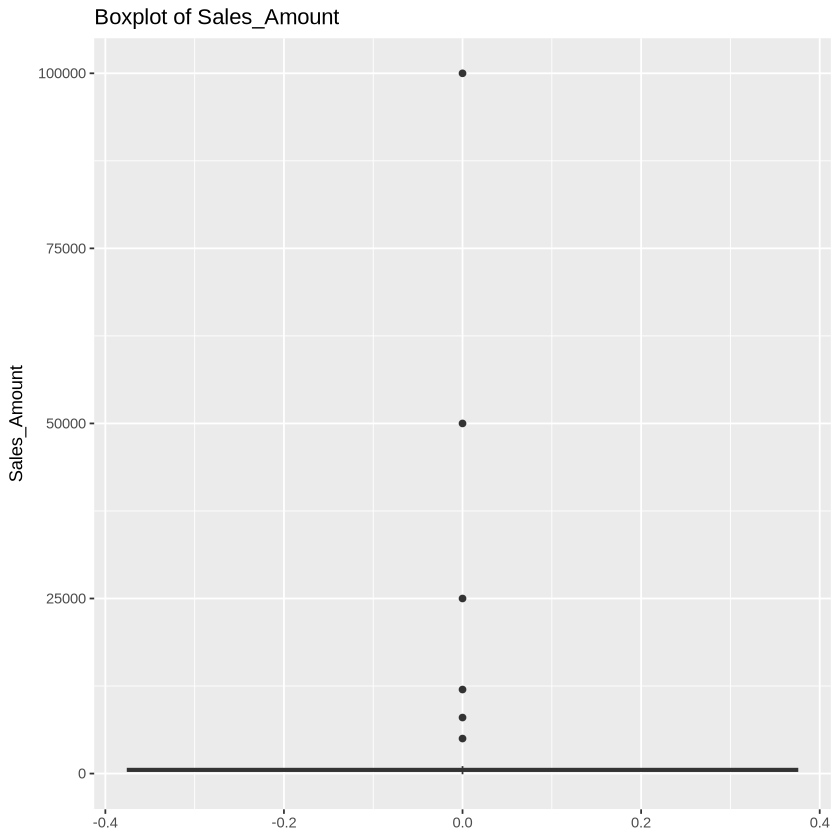

In [90]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(messy_sales, aes(y = Sales_Amount)) +
  geom_boxplot() +
  ggtitle("Boxplot of Sales_Amount") # YOUR CODE HERE

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [91]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- messy_sales %>% # YOUR CODE HERE
  filter(Sales_Amount <= upper_threshold & Sales_Amount >= lower_threshold)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

In [92]:
data_capped <- messy_sales %>%
    mutate(Sales_Amount_capped =ifelse(Sales_Amount > upper_threshold,
                                upper_threshold,
                                ifelse(Sales_Amount < lower_threshold,
                                lower_threshold,
                                Sales_Amount)))
print("Capped sales outliers data")
print(data_capped)

[1] "Capped sales outliers data"
    TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
1               1                           Home    362.31745              
2               2   Alice Brown         Clothing    573.07908    2023-10-21
3               3      Jane Doe      Electronics    487.68744    2023-12-28
4               4      Jane Doe      Electronics   5000.00000    2023-06-16
5               5    John Smith            Books    344.17461    2023-05-05
6               6    John Smith            Books    434.95266    2023-11-28
7               7      Jane Doe             Home    489.08635    2023-08-17
8               8      Jane Doe      Electronics    536.92019    2023-05-17
9               9      Jane Doe         Clothing    793.39330    2023-08-13
10             10      Jane Doe      electronics    649.42865    2023-10-16
11             11   Bob Johnson      ELECTRONICS    595.72472    2023-10-20
12             12    John Smith            Books    742

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


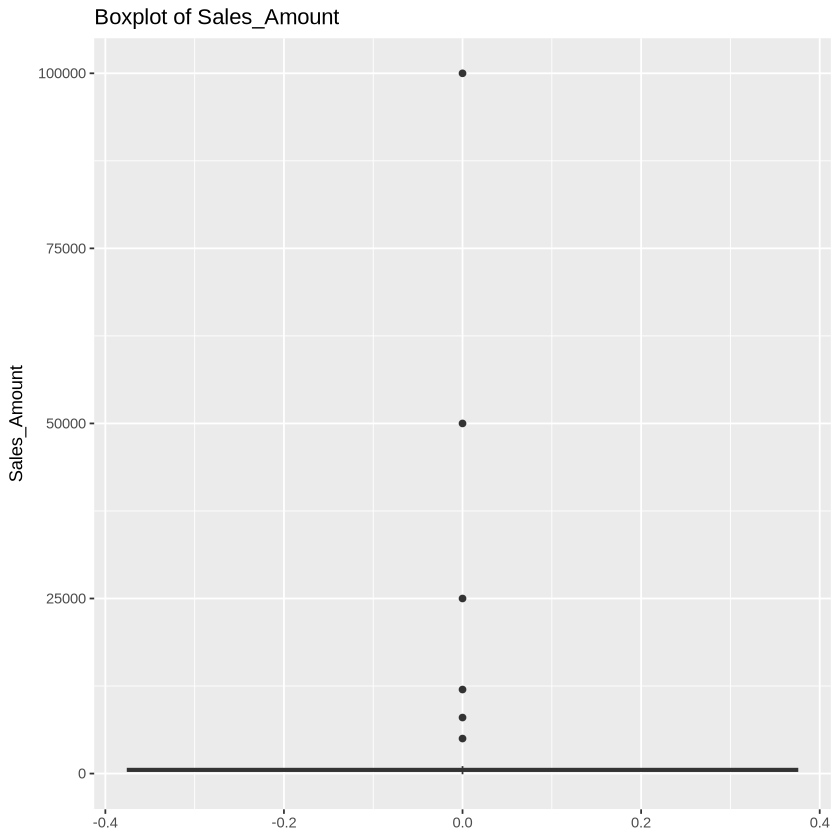

In [93]:
# TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers

boxplot_sales <- ggplot(messy_sales, aes(y = Sales_Amount)) +
  geom_boxplot() +
  ggtitle("Boxplot of Sales_Amount") # YOUR CODE HERE

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [94]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- messy_sales %>% # YOUR CODE HERE
# Hint: Use filter() to keep only rows within the threshold bounds
filter(Sales_Amount<= upper_threshold & Sales_Amount >= lower_threshold)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


In [95]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed

In [96]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped <- messy_sales %>% # YOUR CODE HERE
### Hint: Use ifelse() to replace values above/below thresholds
    mutate(Sales_Amount_ = ifelse(Sales_Amount > upper_threshold,
                                upper_threshold,
                                ifelse(Sales_Amount < lower_threshold,
                                lower_threshold,
                                Sales_Amount)))
print("Capped sales outliers data")
print(head(sales_outliers_capped))

[1] "Capped sales outliers data"
  TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
1             1                           Home     362.3175              
2             2   Alice Brown         Clothing     573.0791    2023-10-21
3             3      Jane Doe      Electronics     487.6874    2023-12-28
4             4      Jane Doe      Electronics    5000.0000    2023-06-16
5             5    John Smith            Books     344.1746    2023-05-05
6             6    John Smith            Books     434.9527    2023-11-28
  Quantity Sales_Amount_
1        2      362.3175
2        3      573.0791
3       -1      487.6874
4        7     1192.3308
5      100      344.1746
6        4      434.9527


In [97]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1]   -100 100000


In [98]:
### Check for remaining outliers
remaining_outliers <- messy_sales # YOUR CODE HERE
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 200"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [99]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_removed # Choose one: messy_sales, sales_removed_na, sales_imputed, sales_outliers_removed, or sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 172   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -100.0   361.8   517.8   508.4   680.2  1058.3 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

[Write your detailed reasoning here]
I decided to go with sales_outliers_removed because it seemed like the outlier sales were errors. I came to this conclusion when I was comparing the quantity and sales amounts, like Transaction_ID 5 which was $344 for 100 books which seems like a very low price for the quantity, especially compared to the other book sales data. The main focus of messy_sales is sales and having these extreme outliers which look like mistakes caused the mean sales amount to be really high compared to the median. Removing these outliers reduced the median by more than half its original size. Its important for businesses to have accurate data on the mean sales amount because it reveals the average amount a customer is spending which can impact many important things like inventory, marketing, pricing, and forecasting future sales.

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [100]:
# Create comparison summary
comparison_summary <- data.frame(sales_outliers_removed)
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers")
  Original_Data = c(sales_outliers_removed)
    nrow(messy_sales)
    sum(is.na(messy_sales))
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2)
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2)
    "Check manually" # TODO: Calculate this
    
  Final_Data = c(sales_outliers_removed)
    nrow(final_dataset)
    sum(is.na(final_dataset))
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2)
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2)
    "Check manually" # TODO: Calculate this

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] 200

[1] 22

[1] 1614.91

[1] 531.29

[1] "Check manually"

[1] 172

[1] 0

[1] 508.45

[1] 517.84

[1] "Check manually"

[1] "=== DATA CLEANING COMPARISON ==="
    TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
1               1                           Home    362.31745              
2               2   Alice Brown         Clothing    573.07908    2023-10-21
3               3      Jane Doe      Electronics    487.68744    2023-12-28
4               5    John Smith            Books    344.17461    2023-05-05
5               6    John Smith            Books    434.95266    2023-11-28
6               7      Jane Doe             Home    489.08635    2023-08-17
7               8      Jane Doe      Electronics    536.92019    2023-05-17
8               9      Jane Doe         Clothing    793.39330    2023-08-13
9              10      Jane Doe      electronics    649.42865    2023-10-16
10             11   Bob Johnson      ELECTRONICS    595.72472    2023-10-20
11             12    John Smith            Books    742.61228    2023-06-26
12             13      Jane Doe      ELECTRONICS 

---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

[Imputation is good for datasets that are small where its important to preserve the sample size. An example of this would be mode imputation on a dataset if something like an item's category in a dataset had missing values. Removal may be better for a larger dataset as data quality wouldn't take a large hit because there is still a lot of data to use. For example, mean imputation on a large dataset with missing values in an age column. ]

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

[Outliers in sales data are not always errors be errors. For example, a bookstore could sell both low priced books and textbooks. The pricier textbooks could be considered an outlier and shouldn't be removed. The context of the business and their products would have to be considered when it comes to deciding if something is an outlier or not. ]

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

[Outliers can heavily skew the mean. If these outliers were errors, it would lead to things like overstocking and predicting a much higher value for future sales. ]

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

[Modifying sales data outliers in order to make a report look better could potentially be unethical if those outliers were not errors and actual sales. Work should be done to analyze if the outliers are truly random errors or actual values, and an analyst should document their decisions and be prepared to share their reasoning on how they got the numbers that they did.]

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**